<a href="https://colab.research.google.com/github/joaobezcerra/LogisticRegression/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn seaborn pandas numpy tensorflow matplotlib

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
x, y, z = mnist['data'], mnist['target'], mnist['DESCR']

In [ ]:
print (x)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

In [ ]:
print (y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [ ]:
print (z)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

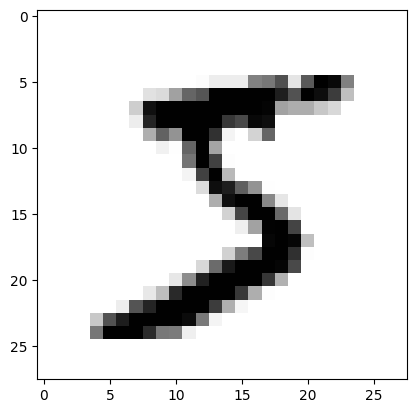

In [ ]:
primeiro_digito = x.iloc[0]
primeiro_digito_array = primeiro_digito.values.reshape (28, 28)

plt.imshow(primeiro_digito_array, cmap='binary')
plt.show()

In [ ]:
print (y[0])

5


In [ ]:
x, y = mnist.data, mnist.target.astype('int')
x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.15)

In [ ]:
my_first_model = LogisticRegression(solver="lbfgs", max_iter=100)
my_first_model.fit(x_treino, y_treino)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_previsto = my_first_model.predict (x_test)

In [ ]:
acurracy = accuracy_score(y_test, y_previsto)
print (acurracy)

0.9162857142857143


In [ ]:
precision = precision_score(y_test, y_previsto, average='macro')
print (precision)

0.9152827559144731


In [ ]:
recall = recall_score(y_test, y_previsto, average='macro')
print (recall)

0.9151493241052799


In [ ]:
matrix = confusion_matrix(y_test, y_previsto)

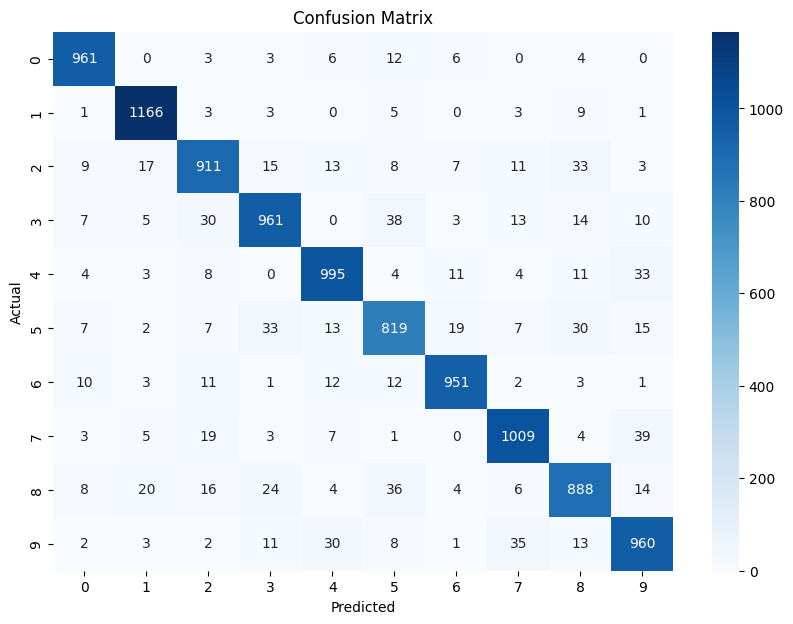

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()